In [1]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy




In [6]:
!pip install wordcloud

In [ ]:
pip install -U pip setuptools wheel

In [ ]:
pip install -U spacy

In [7]:
python -m spacy download en_core_web_lg 

SyntaxError: invalid syntax (3056375695.py, line 1)

In [8]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy

In [ ]:
python -m spacy download en_core_web_sm

In [ ]:
pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [45]:
tweets_list = []
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('jiminie since:2021-01-12 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])

In [46]:
tweets_to_df.head()

,Tweets
0,I didn't realize I missed jiminie so much unti...
1,"@blckswnjimin Yes, I think it is fate that bri..."
2,Through this video I met Jiminie 🥺 I loved how...
3,@BTS_twt Its been 9 years\nThank you for comin...
4,Thank you for coming to my life jiminie 💜\nyou...


In [47]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets

,Tweets,cleanedTweets
0,I didn't realize I missed jiminie so much unti...,I didn't realize I missed jiminie so much unti...
1,"@blckswnjimin Yes, I think it is fate that bri...","Yes, I think it is fate that brings the 7 tog..."
2,Through this video I met Jiminie 🥺 I loved how...,Through this video I met Jiminie 🥺 I loved how...
3,@BTS_twt Its been 9 years\nThank you for comin...,Its been 9 years Thank you for coming to my l...
4,Thank you for coming to my life jiminie 💜\nyou...,Thank you for coming to my life jiminie 💜 you ...


In [48]:
tweets_to_df.to_csv('tweets_jimin.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_jimin.csv',index_col=0) #reads csv file

In [49]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity
0,I didn't realize I missed jiminie so much unti...,0.200000,0.200000
1,"Yes, I think it is fate that brings the 7 tog...",0.687500,-0.312500
2,Through this video I met Jiminie 🥺 I loved how...,0.550000,0.433333
3,Its been 9 years Thank you for coming to my l...,0.633333,0.710417
4,Thank you for coming to my life jiminie 💜 you ...,0.633333,0.710417


In [50]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [51]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    10
Neutral      4
Negative     2
Name: Analysis, dtype: int64

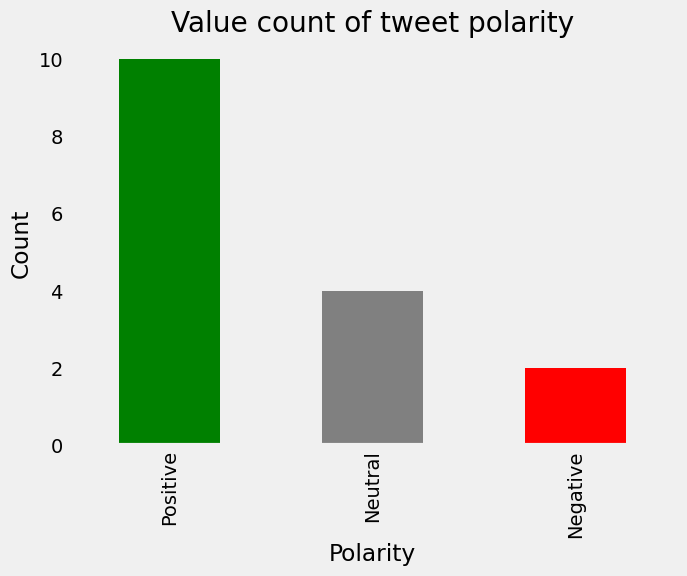

In [52]:
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

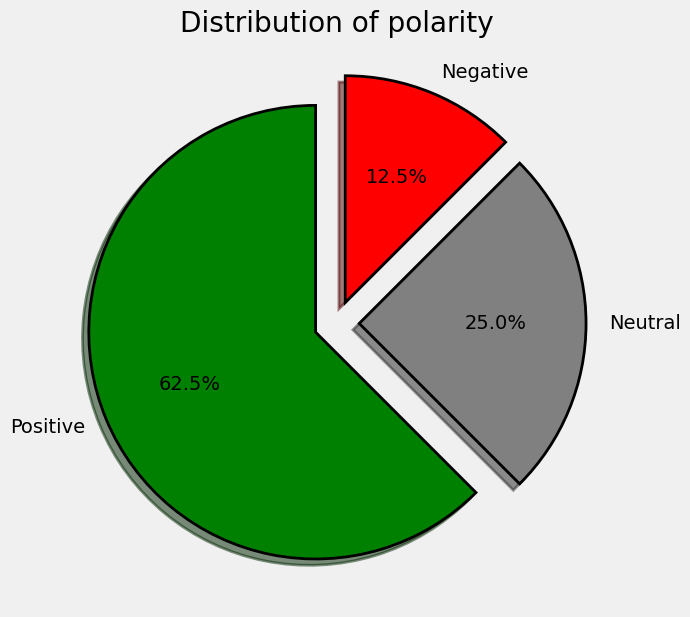

In [53]:
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

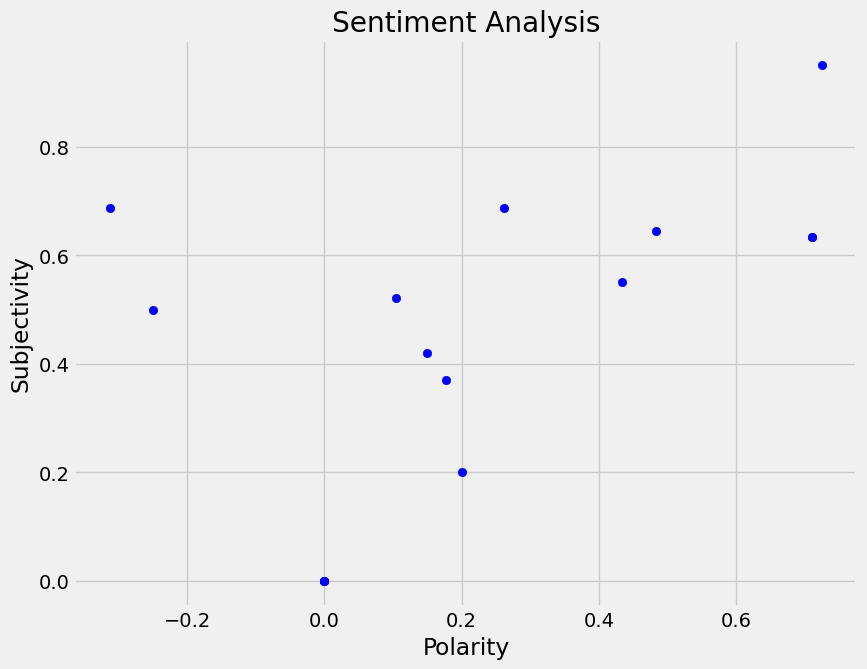

In [54]:
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

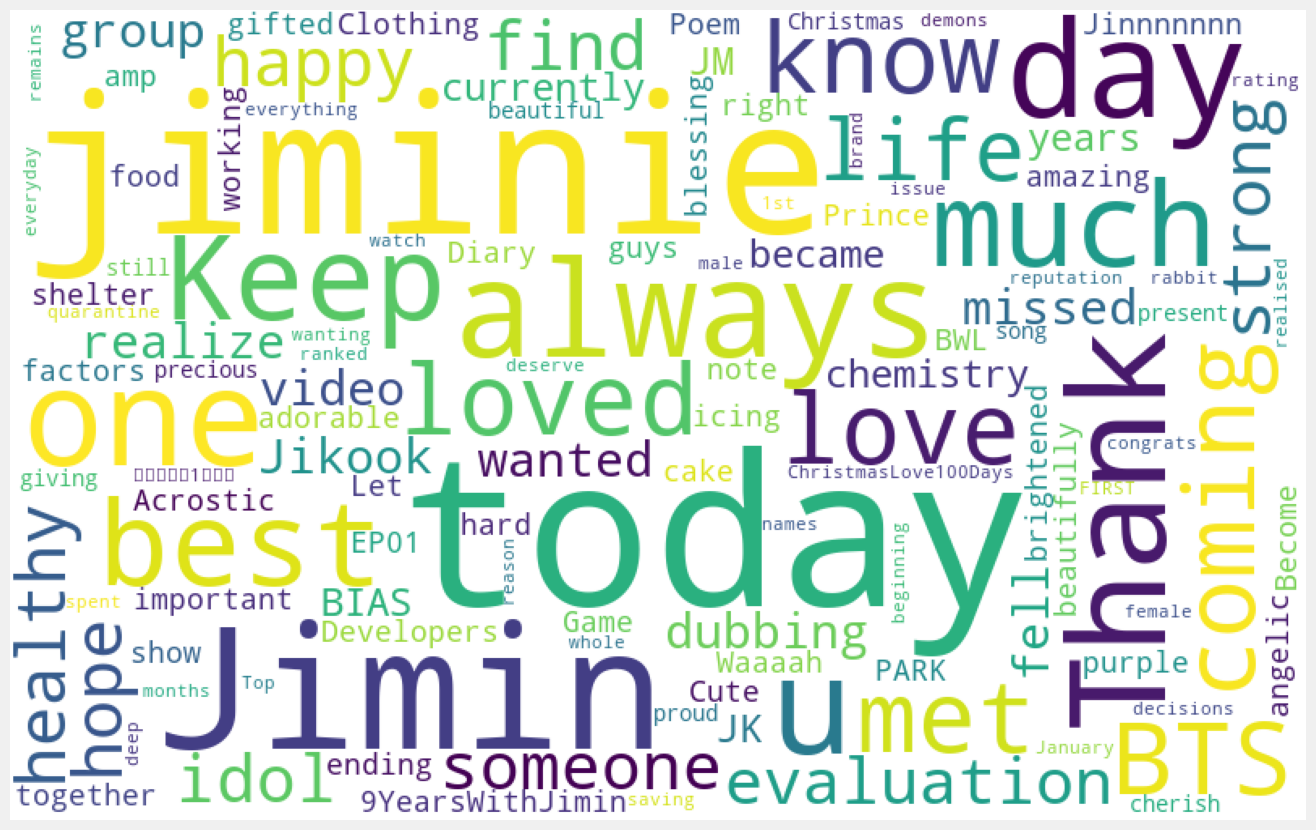

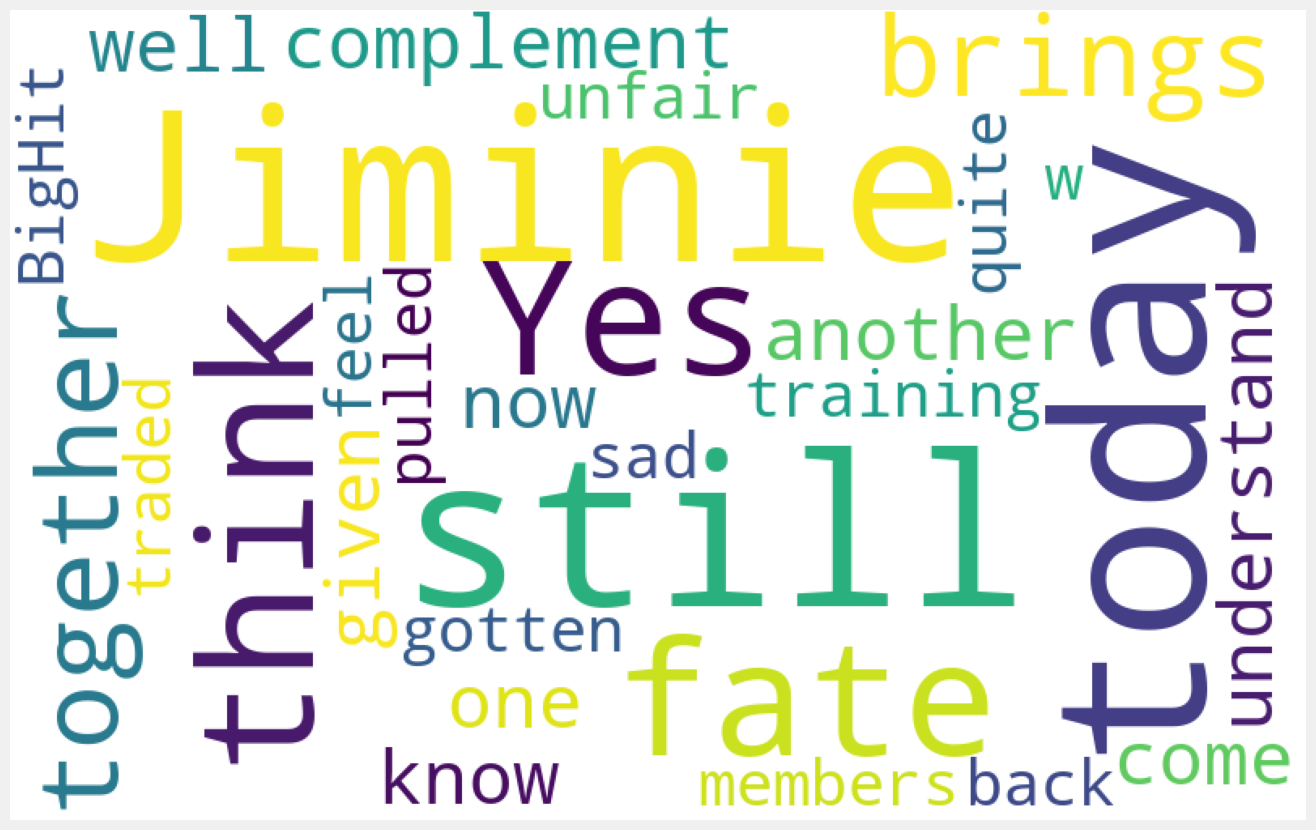

In [55]:
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [56]:
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

['I',
 "didn't",
 'realize',
 'I',
 'missed',
 'jiminie',
 'so',
 'much',
 'until',
 'today']

In [57]:
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

NameError: name 'nlp' is not defined

In [58]:
!pip install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio===0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ---------------------------------------- 2.4/2.4 GB 598.7 kB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 946.7 kB/s eta 0:00:00
     -------------------------------------- 336.6/336.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers